# Monte Carlo Methods
## Motivation
If we have to integrate over a volume, we will have $N^{3n}$ points for $3n$ dimensional integral. This is not feasible for large $n$. In statistical mech, every particle has its own dimension, so integration will be very costly. Another problem is model fitting where a model can have 100s of parameters.
## Monte Carlo Methods
The idea of Monte Carlo Integration is to randomly sample the space of integration using just a few points to get the integral.

Eg: For circle of radius 1, we can randomly sample points in a square of side length 2. The ratio of points inside the circle to the total number of points will be the ratio of the area of the circle to the area of the square. This is the basic idea of Monte Carlo Integration. 

If we plot a frequency histogram, we will get a Gaussian. Random numbers can be generated using an actual physical process, Eg: Geiger counter. In practice, pseudo random number generator may be used. $x_0 = seed$, $x_1 = mod(\frac{a x_0 +b}{2^{16}})$ where $a$ and $b$ are constants. This is a simple linear congruential generator. As $a, b$ are large, there will be an overflow, which wont be a predictable number. Therefore, we say its a random number. This way we get a uniform distribution . We can get other distributions by transforming the uniform distribution. Eg: $x \sim U( 0,1)$, $y = -\log(x) \sim \exp(1) $.
### Area of Circle using Monte Carlo Integration

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N=2000

x = np.random.rand(N)
print(x)
x = 2*x-1

y = np.random.rand(N)
y = 2*y-1

r = 1

count = 0
for i in range(0, N):
    if (x[i]**2 + y[i]**2) < r**2:
        count += 1

area = (count/N)*4
print(area)

r2 = x**2 + y**2
inside = np.where(r2<1, 1, 0)
count = np.sum(inside)
print(count*4/N)

[0.36207416 0.9490969  0.74419767 ... 0.0905378  0.47649937 0.97212792]
3.172
3.172


### Area of a 10-D unit sphere
$$V_{10} = \frac{\pi^5}{120}$$

In [2]:
import numpy as np

N = 100000
dims = 10

x = np.array([np.random.rand(dims) for i in range(N)])
x = 2*x - 1
x = x**2

r = np.array([np.sum(sample) for sample in x])

inside = np.where(r<1, 1, 0)
count = np.sum(inside)
print(count*(2**dims)/N)

2.60096


In [3]:
(np.pi**5)/120

2.550164039877345

### Integral of a cos function

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

a, b = 0, 3*math.pi/2
ymax, ymin = 1, -1

N = 10000
dy = 1e-3

x = np.random.rand(N)
x = x*(b-a) + a
y = np.random.rand(N)
y = y*(ymax-ymin) + ymin

pt_area = 0

sig = lambda x: 1 if x > 0 else -1

for i in range(0, N):
    f = math.cos(x[i])
    if f*y[i] > 0:
        diff = abs(f) - abs(y[i])
        if f > y[i] and f > 0 or f < y[i] and f < 0:
            pt_area += sig(y[i])

actual_area = pt_area*(abs(a-b)*abs(ymax-ymin))/N
actual_area

-1.048035309237555

## Error in MC Method
We can repeat the MC method with a different random seed, then we get the mean and the standard deviation (sample)
\begin{align*}
\langle \tilde I \rangle &= \frac{\sum_M \tilde I_i}{M} \\
\sigma^2 &= \frac{1}{M-1} \sum_{i=1}^M (\tilde I_i -  \langle\tilde I \rangle)^2
\end{align*}
An integral can also be viewed as an average over some probaboloty distribution function $\rho(x)$
\begin{align*}
I &= \int_a^b f(x)dx = \int_a^b \rho(x) \frac{f(x)}{\rho(x)}dx \\
&= \bigg\langle \frac{f(x)}{\rho(x)} \bigg\rangle
\end{align*}
We can use this to design a probability function according to the function to capture high variation regions by sampling more points and lesser points else where. Now, how do you generate such distributions?



## Casting one probability distribution to other
We start with a standard uniform distribution $x \in U(0, 1)$. Say we need to convert this to another distribution given by a pdf $y = f$. 
\begin{align*}
f(y) \ dy &= dx \\
\frac{dy}{dy} &= \frac{1}{f(y)}
\end{align*}
If $f(y) = \sin(y)$, then after calculation, $y = \arccos(1-x)$ where $x \in U(0, 1)$

0.03130355407768677 [0.00560665 0.0369102  0.06821376 0.09951731 0.13082087 0.16212442
 0.19342797 0.22473153 0.25603508 0.28733864 0.31864219 0.34994574
 0.3812493  0.41255285 0.44385641 0.47515996 0.50646351 0.53776707
 0.56907062 0.60037418 0.63167773 0.66298129 0.69428484 0.72558839
 0.75689195 0.7881955  0.81949906 0.85080261 0.88210616 0.91340972
 0.94471327 0.97601683 1.00732038 1.03862393 1.06992749 1.10123104
 1.1325346  1.16383815 1.1951417  1.22644526 1.25774881 1.28905237
 1.32035592 1.35165947 1.38296303 1.41426658 1.44557014 1.47687369
 1.50817725 1.5394808  1.57078435]


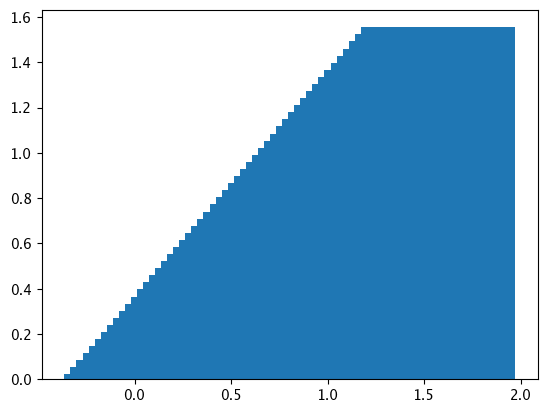

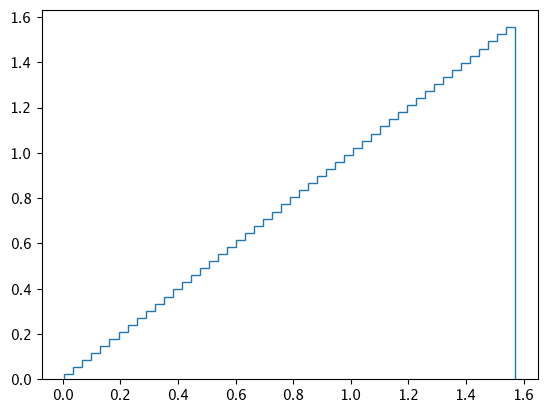

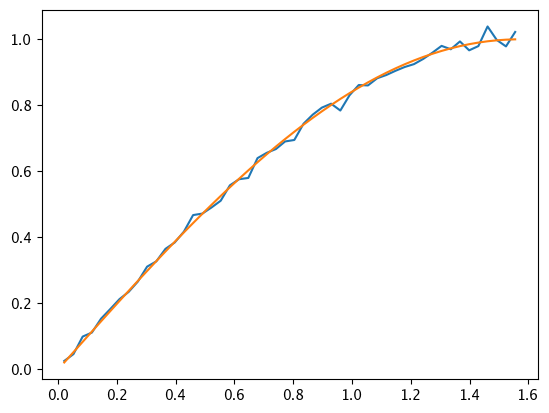

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000
x = np.random.rand(N)

y = np.arccos(1.0-x)
counts, bins = np.histogram(y, bins=50)
deltax = bins[1]-bins[0]
print(deltax, bins)

pdf = (counts/N)/deltax
bin_mid = (bins[:-1]+bins[1:])/2

plt.bar(bins[1:], bin_mid)
plt.show()
plt.clf()

plt.stairs(bin_mid, bins)
plt.show()
plt.clf()

plt.plot(bin_mid, pdf)
plt.plot(bin_mid, np.sin(bin_mid))
plt.show()

## Generating a Gaussian
It is difficult to integrate a general Gaussian analytically between two points. The indefinite integral is also called error function.
### Box-Muller Transform
Consider Standard Normal $N(0, 1)$
$$f(y) = \frac{1}{\sqrt{2\pi}} exp \Bigg[ -\frac{y^2}{2} \Bigg]$$
Now say $x \in N(0, 1)$ and $y \in N(0, 1)$ what is the probability of the point $(x_i, y_i)$ to lie in region $[x, x+dx], [y, y+dy]$ is $f(x)f(y) \ dx dy$. This can be converted to polar coordinates. Then the distribution $I^2$ becomes a uniform distribution on $[0, 1]$. This is the Box-Muller transform.
\begin{align*}
I^2 &= \int g(r) \ dr \ \int g(\theta) \ d\theta \\
\frac{dr}{dx} &= \frac 1 {g(r)} \ \ \text{or} \\
\int g(r) \ dr &= \int dx \\
\int r \ e^{-\frac{r^2}{2}} \ dr &= x + c \\
r &= \sqrt{(-2\ln(1-x))} \ \text{where}  \ x \in U[0, 1] \ \text{and} \\
\theta &= U[0, 2\pi] \\
1-x \in U[0, 1] &\implies x \in U[0, 1]
\end{align*}

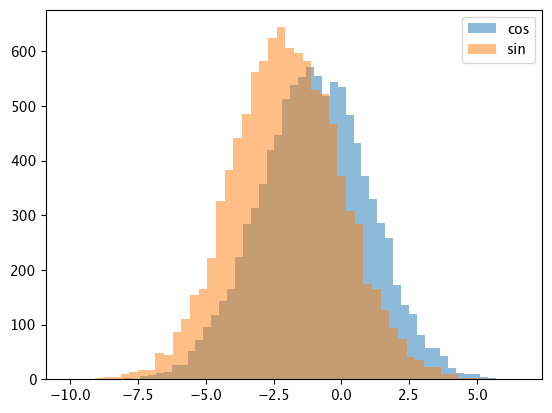

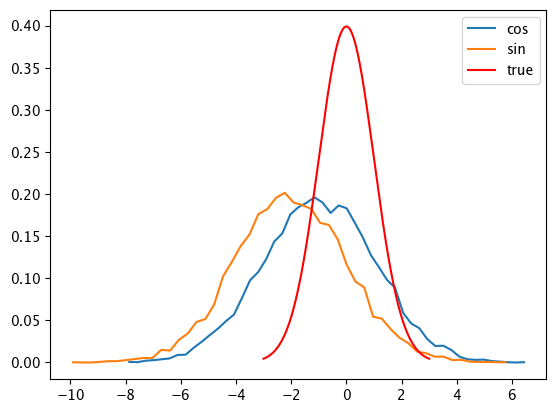

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

x = np.random.rand(N)
y = np.random.rand(N)

r = np.sqrt(-2*np.log(x))
theta = 2*np.pi*y

g = (1/2*np.pi)*r*theta

mu, sigma = 1, 2
y1 = (r*np.cos(theta))*sigma - mu # scale and move
y2 = (r*np.sin(theta)-mu)*sigma # move and scale

g = lambda x: np.exp(-x**2/2)/(np.sqrt(2*np.pi))
compare = np.linspace(-3, 3, N)

counts1, bins1 = np.histogram(y1, bins=50)
deltax1 = bins1[1]-bins1[0]
pdf1 = (counts1/N)/deltax1
bin_mid1 = (bins1[:-1]+bins1[1:])/2

counts2, bins2 = np.histogram(y2, bins=50)
deltax2 = bins2[1]-bins2[0]
pdf2 = (counts2/N)/deltax2
bin_mid2 = (bins2[:-1]+bins2[1:])/2

plt.hist(y1, bins=50, alpha=0.5, label='cos')
plt.hist(y2, bins=50, alpha=0.5, label='sin')
plt.legend()
plt.show()

plt.plot(bin_mid1, pdf1, label='cos')
plt.plot(bin_mid2, pdf2, label='sin')
plt.plot(compare, g(compare), 'r', label='true')
#plt.yscale('log')
plt.legend()
plt.show()


## Random Walk (Markov Process)
A random walk is a stochastic process that describes a sequence of random steps on a lattice. Our lattice is a one-dimensional line, and we can move either to the left or to the right with equal probabilty.
Space $0 \to N$ Whats the propbability that we end up at $x = m$?
$$P(x=m) W(m, N) =  \binom{N}{\frac{N+m}2}\frac{1}{2^{m}} = \frac 1 {2^N} \frac{N!}{(\frac{N+m}{2})!(\frac{N-m}{2})!}$$
$$\text{rms}(P) = ?$$

\begin{align*}
(1+u)^N & = \sum_{m=0}^N (\text{coeff}(u^{N-m}))u^{N-m}\\
&= \sum_{k \in \text{range}(-N, N, 2)} \text{coeff}(u^{\frac{N-k}2})u^{\frac{N-k}2}\\
N(1+u)^{N-1} & = \sum_{k \in \text{range}(-N, N, 2 )} \text{coeff}(u^{\frac{N-k}2})\frac{N (N-k)}2u^{\frac{N-k}2} \ (derivative)\\
N(1+u)^{N-1} &= \sum_{k \in \text{range}(-N, N, 2)} 2^N W(k, N) (\frac{N-k}2) u^{\frac{N-k-2}2} \\
N(2^{N-1}) &= \sum_{k \in \text{range}(-N, N, 2)}  W(k, N) \frac{N}{2} 2^N - \sum_{k=-N}^N W(k, N) \frac{k}2 2^N \\
N 2^{N-1} &= N 2^{N-1} - 2^{N-1} \sum_{k=-N}^N k W(k, N) \\
\implies \langle k \rangle &= 0 \ \text{and taking second derv.} \ \langle k^2 \rangle = \sqrt{N}\\
\end{align*}

Striling's approximation: $N! \approx \sqrt{2\pi N} \left(\frac Ne\right)^N$ 

So $W(m, N) = \sqrt{\frac{2}{N \pi}} \  exp(-\frac{m^2}{2N})$

Now if step size is $l$ and $x = ml$, time is $\tau$ per step $t = N \tau$. No. of steps to take is $m^2 = \frac{x^2}{l^2} = N$

$$W(m, N) = \sqrt{\frac{2}{\frac{x^2}{l^2} \pi}} \  exp(-\frac{x^2}{4 D t}) \ \text{where} \ D = \frac{l^2}{2 \tau} $$

## Metropolis (Travelling Salesman) Greedy Algorithm
In many cases, we only know the local pronbaibilities and not the global ones. In such cases, we can use the Metropolis algorithm, which is a type of greedy algorithm. The Metropolis algorithm is a simple and efficient algorithm for finding the global optimum of a function, given only local information. This problem was first introduced by Nicholas Metropolis, Edward Teller, et. al. in 1953 to model the number of neutrons in Nuclear Bomb and where to place the neutron source.

We only have a local pdf $\phi$ that doesnt sum to one. so we have the options $\phi_1$ and $\phi_2$, we take a random walk step $x_1 = x_0 + \Delta x$. Pick a random number $r$ between 0 and 1. If $r < a$, then we accept the step and move to $x_1$. Otherwise, we reject the step and stay at $x_0$.

Define acceptance ratio $a = min(1, \frac{\phi(x_1)}{\phi(x_0)})$

Ex: implement f(x) = -sin(x)ln(x)

0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054988028121 525 0.052505250525052505
0.05252054

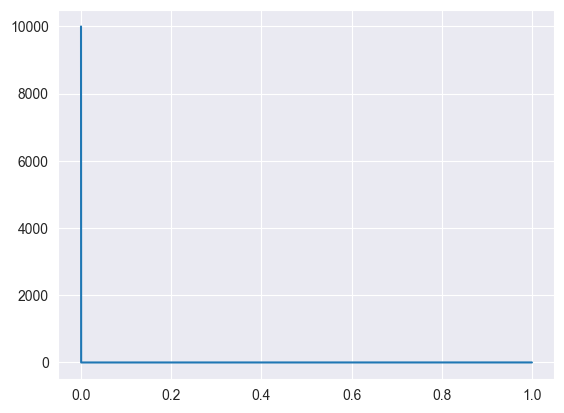

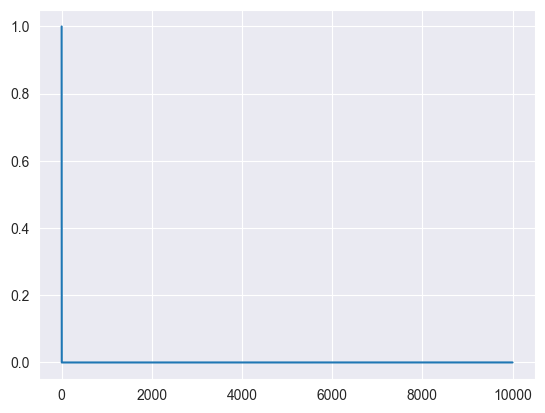

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

phi = lambda x: -math.sin(x)*math.log(x) if x !=0 else 0

randnum = lambda : np.random.random()

N = 10000
x = np.linspace(0, 1, N)
counts = np.zeros(N)
lin_dens = x[1]-x[0]

def counts_fill(n):
    id = int(n/lin_dens)
    print(n, id, x[id])
    counts[id] += 1

x_0, x_1 = 0., 0.

jump_size = 0.5

x_0 = randnum()
counts_fill(x_0)

for i in range(N-1):
    x_1 = randnum()
    prob = phi(x_1)/phi(x_0)
    jump_prob = min(1, prob)
    to_jump = np.random.choice(1, 1, [1.0-jump_prob, jump_prob])[0]
    if to_jump == 0:
        x_0 = x_0
    else:
        if x_1 <= 1 and x_1 >= 0:
            x_0 = x_0 + x_1*jump_size
    counts_fill(x_0)

counts, bins = np.histogram(counts, bins=N)
deltax = bins[1]-bins[0]
pdf = (counts/N)/deltax
bin_mid = (bins[:-1]+bins[1:])/2

plt.plot(x, counts)
plt.show()
plt.plot(bin_mid, pdf)
plt.show()

In [8]:
print(list(counts))

[np.int64(9999), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64

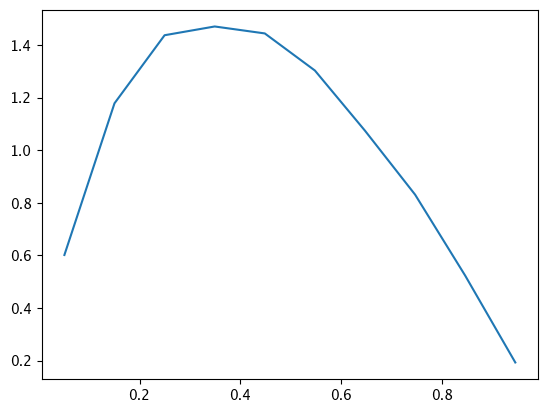

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

phi = lambda x: -math.sin(x)*math.log(x) if x > 1e-16 and x <= 1 else 0
randnum = lambda : np.random.random()

N = 100000
x = np.linspace(0, 1, N)
counts = np.zeros(N)
lin_dens = x[1]-x[0]

def counts_fill(n):
    id = int(n/lin_dens)
    #print(n, id, x[id])
    counts[id] += 1

x_0, x_1 = 0., 0.

dx = 0.5

seed = randnum()

history = [seed]

for i in range(N):
    x_0 = history[-1]
    x_1 = x_0 + dx*(randnum()-0.5)

    prob = phi(x_1)/phi(x_0)
    jump_prob = min(1, prob)

    if randnum() >= jump_prob:
        history.append(x_0)
    else:
        history.append(x_1)
    #counts_fill(x_0)

counts,bins = np.histogram(history,bins=10)
deltax = bins[1]-bins[0]
bin_mid = (bins[1:]+bins[:-1])/2.0
plt.plot(bin_mid,(counts/np.size(x))/deltax)
plt.show()

# plt.plot(x, counts)
# plt.show()
# plt.plot(bin_mid, pdf)
# plt.show()